<a href="https://colab.research.google.com/github/arijitd60/arijitd60/blob/main/Decision_Trees_Classifier_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees Classifier for CIFAR-10

Import Modules

In [30]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics
import plotly.express as px

Loading Dataset

In [23]:
df = pd.read_csv("CIFAR-10.csv")
df = df.set_index("id")
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_962,pixel_963,pixel_964,pixel_965,pixel_966,pixel_967,pixel_968,pixel_969,pixel_970,pixel_971,pixel_972,pixel_973,pixel_974,pixel_975,pixel_976,pixel_977,pixel_978,pixel_979,pixel_980,pixel_981,pixel_982,pixel_983,pixel_984,pixel_985,pixel_986,pixel_987,pixel_988,pixel_989,pixel_990,pixel_991,pixel_992,pixel_993,pixel_994,pixel_995,pixel_996,pixel_997,pixel_998,pixel_999,pixel_1000,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31953,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,...,186,194,198,201,189,173,156,139,142,145,141,141,139,140,143,139,138,143,146,135,117,112,122,104,58,34,131,184,97,83,177,168,179,188,202,218,218,207,191,6
34452,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,...,159,131,94,102,108,128,154,156,182,179,125,83,88,63,43,75,58,45,35,21,14,11,14,59,49,54,81,103,123,131,163,158,163,145,43,19,20,74,134,9
60897,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,...,99,89,78,72,70,71,74,76,78,75,74,72,73,73,75,78,78,70,66,68,71,70,63,53,54,62,66,68,70,78,106,99,95,89,82,78,79,82,84,9
36953,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,...,93,94,82,81,95,94,96,104,108,112,110,108,124,119,105,107,117,127,116,124,115,111,116,107,109,106,96,80,76,82,97,94,93,97,96,94,96,79,78,4
1981,170,168,177,183,181,177,181,184,189,189,188,183,182,184,184,180,177,177,177,176,175,175,173,170,169,168,166,163,163,162,158,157,168,172,171,166,171,174,177,179,...,72,77,77,85,86,86,86,87,92,97,91,94,94,94,93,89,84,82,78,78,75,67,68,68,67,66,72,76,71,71,67,68,69,72,79,80,77,82,80,1


Splitting train and test sets

In [24]:
x = df.drop(["label"], axis=1)
y = df["label"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)
print("df = ", df.shape)
print("x_train = ", x_train.shape)
print("x_test = ", x_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

df =  (3999, 1002)
x_train =  (2999, 1001)
x_test =  (1000, 1001)
y_train =  (2999,)
y_test =  (1000,)


Training a Decision Tree Model for CIFAR-10

In [25]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Testing the Trained Model

In [27]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
print("Accuracy =", accuracy)

cm = sklearn.metrics.confusion_matrix(y_test, y_predicted)
cm

Accuracy = 0.174


array([[16,  8, 14,  7, 11,  4,  9,  6, 12,  9],
       [ 7, 17,  6,  7,  5, 10,  4,  9, 14, 12],
       [20,  6, 14,  7,  9,  8, 14,  8,  8,  6],
       [ 9,  7,  9,  9,  6, 10, 10,  9, 10,  9],
       [14,  5, 12,  8, 23,  5, 20, 10, 13,  8],
       [ 5,  4, 12, 13, 17, 13, 15,  7,  3,  7],
       [ 6,  8, 15,  9, 10,  9, 21, 16,  2,  5],
       [11,  5, 17, 10,  8,  8,  8, 17,  9,  7],
       [10,  9,  7,  5, 10, 11,  8, 13, 26,  9],
       [10, 14,  3, 11,  4, 11,  8,  8, 15, 18]])


HyperParameter Tuning

In [28]:
min_samples_split_list = range(2,10)
criterion_list = ["gini", "entropy"]
result_df = pd.DataFrame(columns=["min_samples_split", "criterion", "Accuracy"])

for k in min_samples_split_list:
  for criterion in criterion_list:
    model = sklearn.tree.DecisionTreeClassifier(criterion=criterion, min_samples_split=k)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
    result_df = result_df.append({"min_samples_split": k, "criterion": criterion, "Accuracy": accuracy}, ignore_index=True)

    result_df

Visualize

In [31]:
k_df = result_df[result_df["criterion"]=="gini"]

fig = px.line(x=k_df["min_samples_split"], y=k_df["Accuracy"], labels={'x':'min_samples_split', 'y':'Accuracy'})
fig.show()

In [32]:
criterion_df = result_df[result_df["min_samples_split"]==4]

fig = px.bar(criterion_df, x='criterion', y='Accuracy')
fig.show()

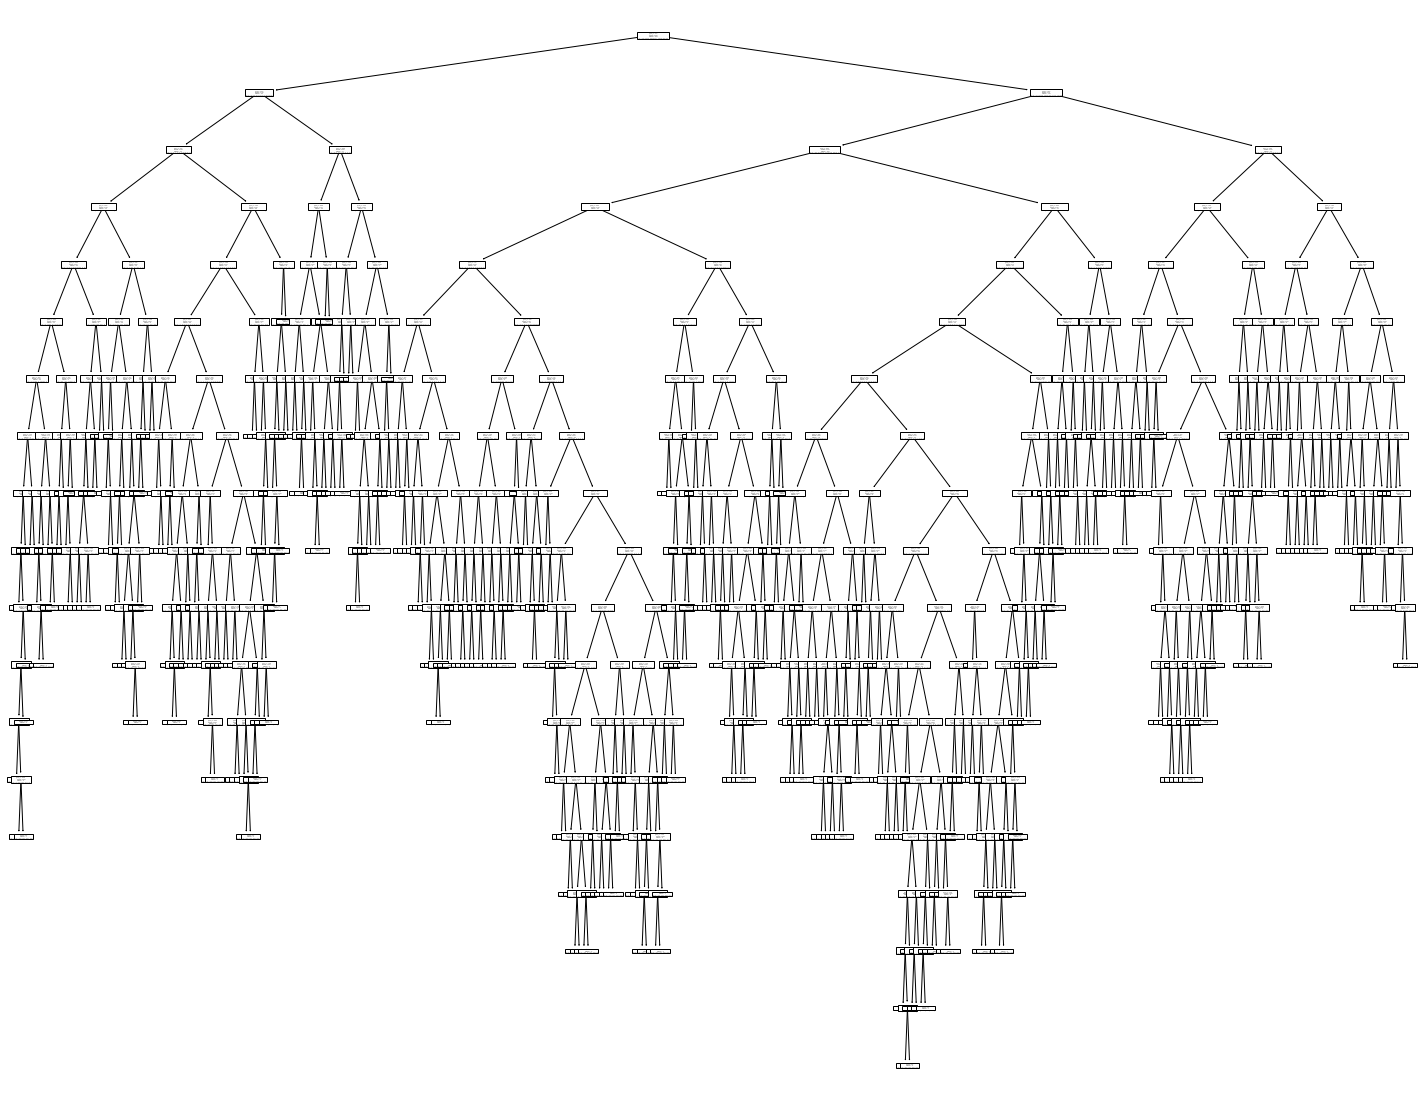

In [33]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model);